In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

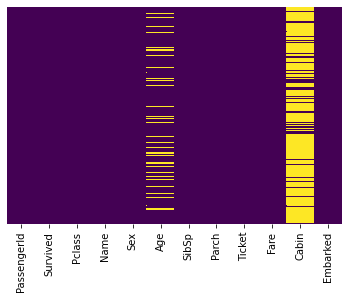

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

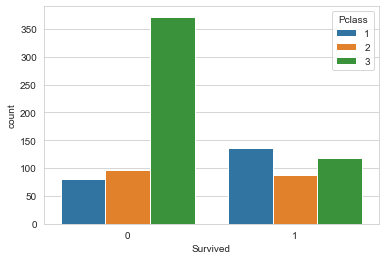

In [6]:
sns.countplot(x='Survived',data=train,hue='Pclass')

C:\Users\hi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

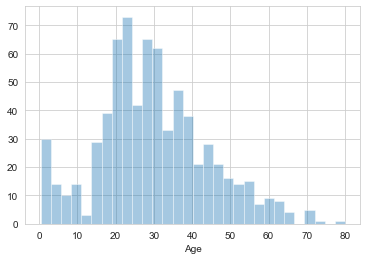

In [7]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:ylabel='Frequency'>

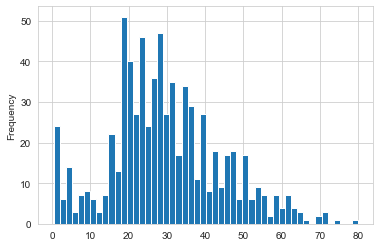

In [8]:
train['Age'].plot(kind='hist',bins=50)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

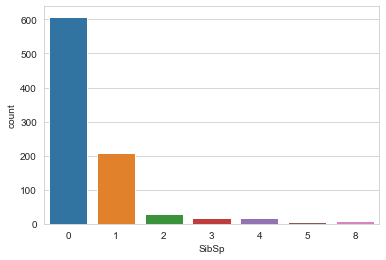

In [10]:
sns.countplot(x='SibSp',data=train)

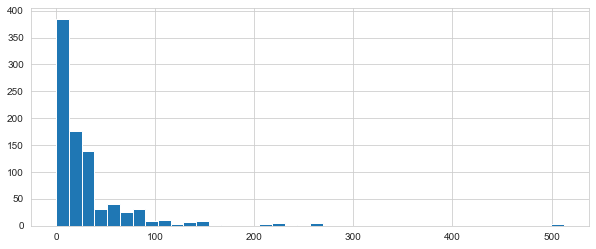

In [11]:
train['Fare'].hist(bins=40,figsize=(10,4));

In [12]:
train['Fare'].idxmax()

258

In [13]:
train.iloc[258]

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                          35
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                    512.329
Cabin                       NaN
Embarked                      C
Name: 258, dtype: object

In [14]:
train['Fare'].max()

512.3292

In [16]:
import cufflinks as cf

In [17]:
cf.go_offline()

In [18]:
#train['Fare'].iplot(kind='hist',bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

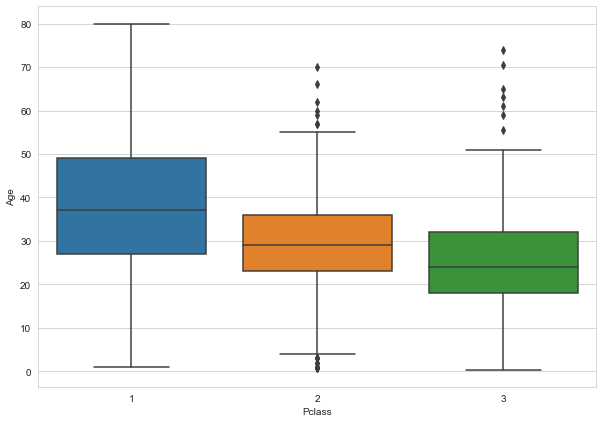

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [23]:
round(train[train['Pclass']==3]['Age'].mean())
#train['Age'].mean()

25

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[0]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass ==2:
            return 30
        else:
            return 25
    else:
        return Age

In [16]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

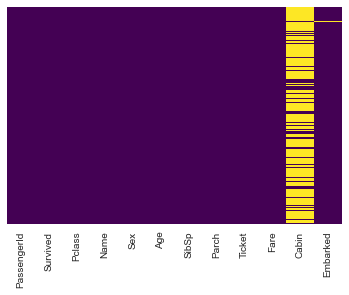

In [18]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
train.drop('Cabin',axis=1,inplace=True)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

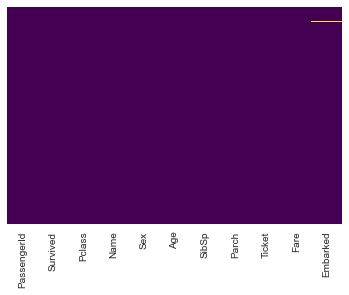

In [30]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
train[train.isnull().any(axis=1)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [22]:
train.dropna(inplace=True)

In [23]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [34]:
#sex = pd.get_dummies(train['Sex'],drop_first=True)

In [24]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train = pd.concat([train,sex,embark],axis=1)

In [36]:
#train = pd.concat([train,sex,embark],axis=1)

In [25]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [26]:
train.drop(['Sex','Name','Ticket'],axis=1,inplace=True)

In [27]:
train.drop('Embarked',axis=1,inplace=True)

In [28]:
train.drop('PassengerId',axis=1,inplace=True)

In [29]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [30]:
X = train.drop('Survived',axis=1)
y = train['Survived']

## Logistic Regression 

In [31]:
from sklearn.model_selection import train_test_split

In [42]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=101)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel = LogisticRegression()

In [45]:
logmodel.fit(X_train,y_train)

C:\Users\hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
predictions = logmodel.predict(X_test)

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       163
           1       0.81      0.67      0.74       104

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



In [49]:
from sklearn.metrics import confusion_matrix 

In [50]:
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 34,  70]], dtype=int64)

## Random Forest Classifier

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
from sklearn.ensemble import RandomForestClassifier


In [64]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3,random_state=101)

In [65]:
rfc = RandomForestClassifier()

In [66]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [67]:
predictions = rfc.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix 

In [69]:
confusion_matrix(y_test,predictions)

array([[140,  23],
       [ 29,  75]], dtype=int64)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None,5,10,20,30],
        "max_features": ["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]}

np.random.seed(42)

# Split into X and y 
x = train.drop('Survived',axis=1)
y = train['Survived']

# Split into train and test sets 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=101)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,# number of models to try
                            cv=5,
                            verbose=2) 

rs_clf.fit(x_train,y_train)

In [ ]:
rs_clf.best_params_

In [ ]:
y_pred_clf = rs_clf.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred_clf)

In [ ]:
print(classification_report(y_test,y_pred_clf))

In [ ]:
from sklearn.model_selection import GridSearchCV , train_test_split

grid_2 = {'n_estimators': [10, 100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

np.random.seed(42)

# Split into X and y 
x = train.drop('Survived',axis=1)
y = train['Survived']

# Split into train and test sets 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=101)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2) 

rs_clf.fit(x_train,y_train)

In [ ]:
y_gs_clf = gs_clf.predict(x_test)
confusion_matrix(y_test,y_gs_clf)

In [70]:
tata_test = pd.read_csv('titanic_test.csv')

In [71]:
tata_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

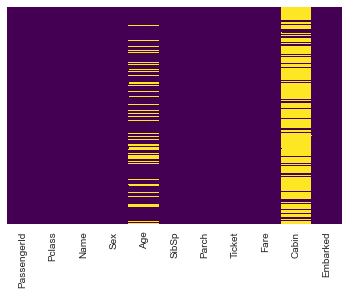

In [72]:
sns.heatmap(tata_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [75]:
round(tata_test[tata_test['Pclass']==3]['Age'].mean())


24

In [76]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[0]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 41
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [77]:
tata_test['Age'] = tata_test[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

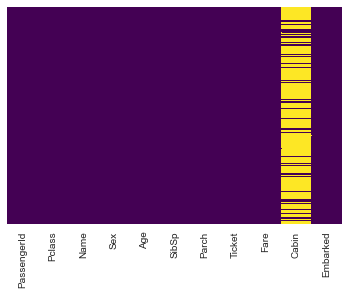

In [78]:
sns.heatmap(tata_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [79]:
tata_test.drop('Cabin',axis=1,inplace=True)

In [80]:
tata_test[tata_test.isnull().any(axis=1)]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [81]:
tata_test['Fare'].tail()

413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, dtype: float64

In [82]:
round(tata_test['Fare'].mean(),4)

35.6272

In [83]:
tata_test['Fare'].fillna(35.6272,axis=0,inplace=True)

In [84]:
tata_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [121]:
tata_test[tata_test.isnull().any(axis=1)]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [85]:
sex = pd.get_dummies(tata_test['Sex'],drop_first=True)
embark = pd.get_dummies(tata_test['Embarked'],drop_first=True)
tata_test = pd.concat([tata_test,sex,embark],axis=1)

In [86]:
tata_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [87]:
tata_test.drop(['Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [89]:
Id = tata_test['PassengerId']

In [90]:
Id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [93]:
tata_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [92]:
tata_test.drop('PassengerId',axis=1,inplace=True)

In [103]:
test_pred = gs_clf.predict(tata_test)

In [132]:
Id = tata_test['PassengerId']

In [104]:
df2 = pd.DataFrame(test_pred,columns=['Survived'],index=[Id])

In [105]:
df2

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [107]:
df2.to_csv('Submission_ta3.csv')